# Project Abstraction

## Credit Score Classification Project

### • In our recent years banks represent special role during our daily transactions wether you buy or sell and            it is very important to choose your customer carefully if you want to buy some thing , As retails or B2C              companies they need to make sure about the inancial matters of the client in the future so bankers create          a smart index called 'I Score' which referes to the future credit score classification .

### • This index save too much cost and time for customer selection and make the decision of installment for            each client very easy 

### • Hence we are coming to the role of machine learning and computational systems not only show the score          of the client but also predict this score in the future 

## Project Structure

### • Here we use a simple block diagram to show the flow of our software in easy way

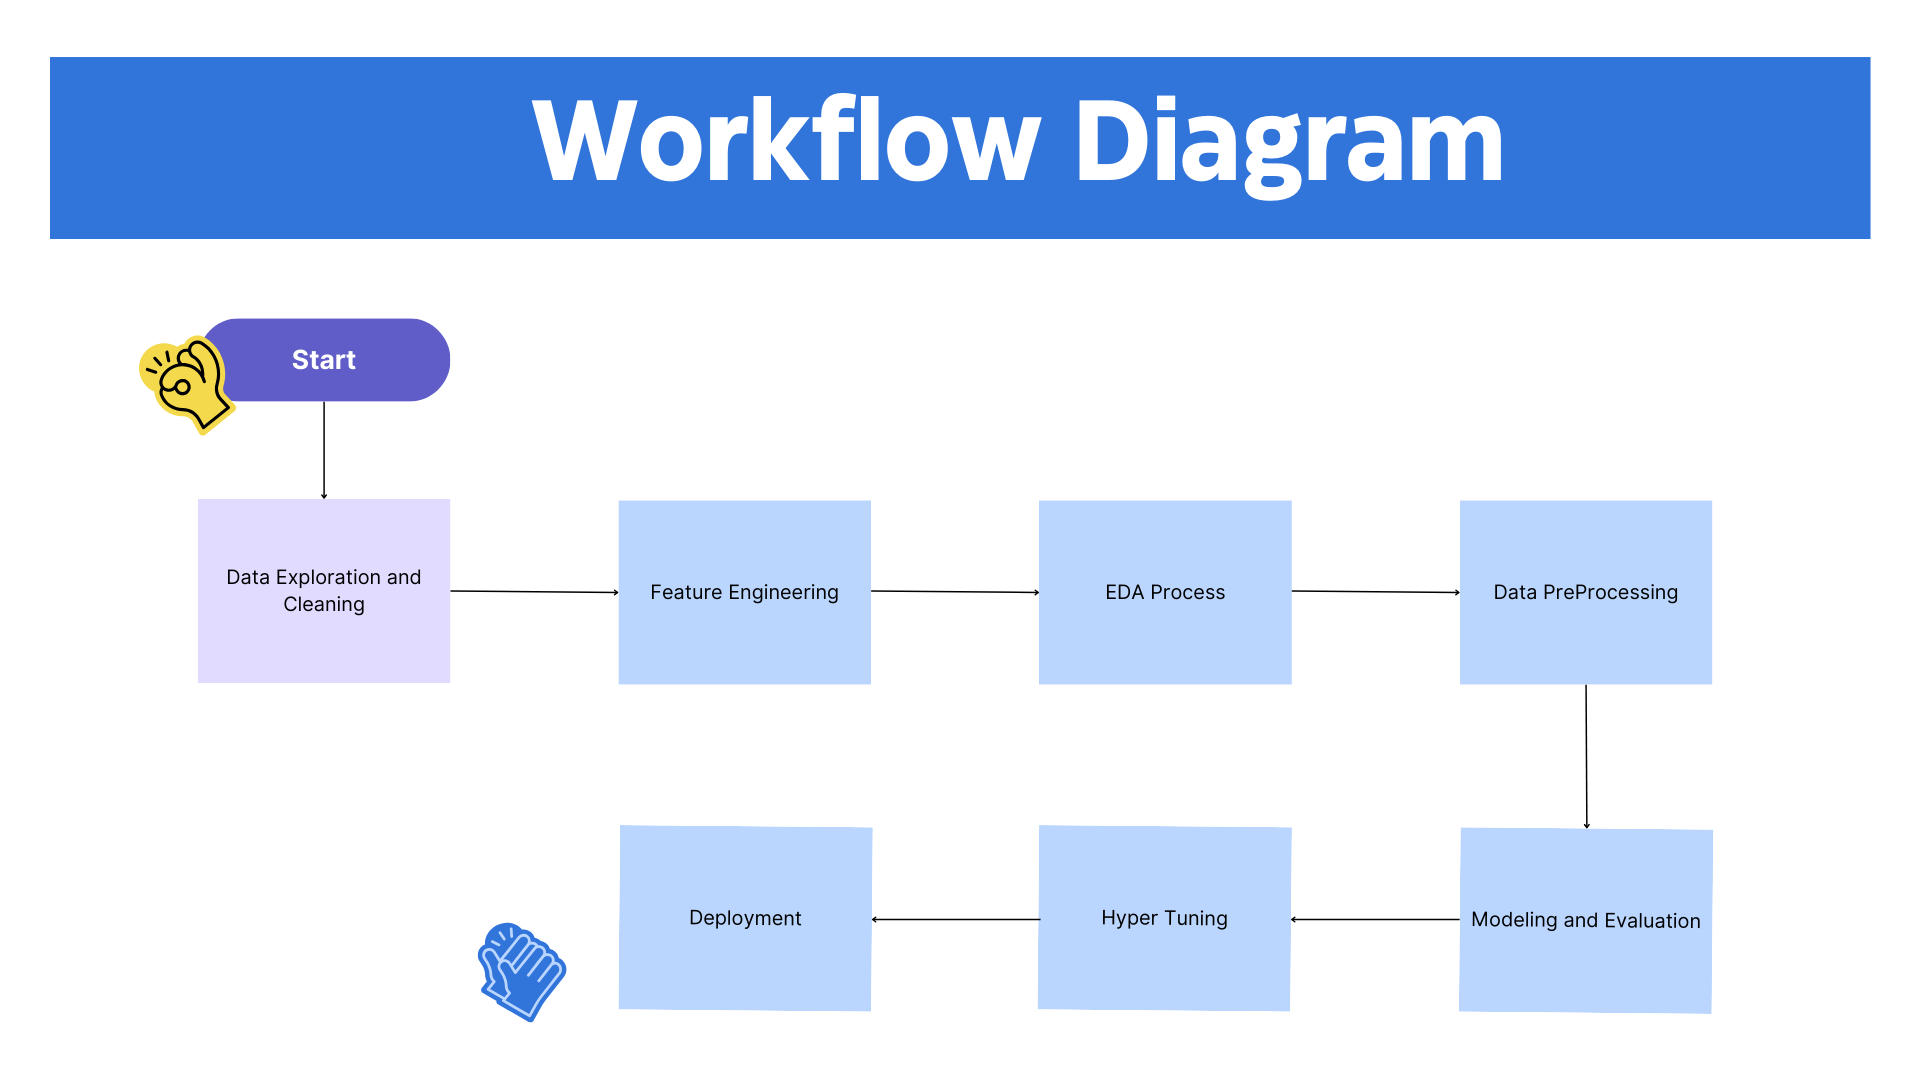

## Our goal is : building strong predictive model allows us later to use it with coming data      for prediction purposes .

## Data Discription :


### ID: An identifier for each record in the dataset.

### Customer_ID: Identifier for individual customers.

### Month: The month associated with the data entry.

### Name: Customer's name.

### Age: Customer's age.

### SSN: Social Security Number or some other form of identification.

### Occupation: Customer's occupation or job title.

### Annual_Income: Customer's annual income.

### Monthly_Inhand_Salary: The amount of money the customer receives as salary on a monthly basis.

### Num_Bank_Accounts: Number of bank accounts the customer has.

### Num_Credit_Card: Number of credit cards the customer possesses.

### Interest_Rate: The interest rate associated with some financial aspect (e.g., loans or credit cards).

### Num_of_Loan: Number of loans the customer has.

### Type_of_Loan: The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).

### Delay_from_due_date: Delay in payments from the due date.

### Num_of_Delayed_Payment: Number of delayed payments.

### Changed_Credit_Limit: Indicates if the customer has changed their credit limit.

### Num_Credit_Inquiries: Number of credit inquiries made by the customer.

### Credit_Mix: The mix of different types of credit accounts (e.g., credit cards, loans).

### Outstanding_Debt: The amount of outstanding debt.

### Credit_Utilization_Ratio: The ratio of credit used to the total credit limit.

### Credit_History_Age: The age of the customer's credit history.

### Payment_of_Min_Amount: Payment behavior regarding minimum required payments.

### Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments made by the customer.

### Amount_invested_monthly: The amount the customer invests on a monthly basis.

### Payment_Behaviour: Behavior related to payments, possibly indicating patterns or trends.

### Monthly_Balance: The customer's monthly balance in their financial accounts.

### Credit_Score: The credit score associated with the customer's creditworthiness.

### -------------------------------------------------------------------------------------------------------------------------------------------------

# Cleaning notebook

### •  The aim of this first  notebook is explore data , inversting it very well , invest its data types or logic , extract pattern and fill missing values 

### •  The data scientists spend most of thier time with this phase and i considre it the most important phase in our project

### •  The challanges for this project is how to go in deep with data and understand its complexity



## import libraries that is going to be used in our project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split , cross_validate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline
from imblearn.base import _ParamsValidationMixin

## import data


In [2]:
raw_data=pd.read_csv('../data/interim/train.csv')
df=raw_data.copy()
df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
72337,0x1bddb,CUS_0xad31,February,Grant McCooli,25,769-35-0460,Musician,16043.16,1224.930000,4,...,_,2358.91,38.115764,10 Years and 8 Months,Yes,56.538118,105.41115219264752,Low_spent_Small_value_payments,250.54373022969867,Poor
58248,0x16b4e,CUS_0x278f,January,Georgina Prodhanm,25,094-63-0433,Lawyer,14646.28,1186.523333,6,...,Standard,522.36,33.710248,16 Years and 4 Months,Yes,81637.000000,19.29273007347024,!@9#%8,303.70970941204564,Standard
774,0x1a88,CUS_0x3f04,July,Jenniferu,25_,465-93-9571,Manager,43758.34_,3454.528333,5,...,_,1194.28,31.250601,33 Years and 7 Months,No,56.311421,36.81438810916744,High_spent_Large_value_payments,492.32702471075083,Standard
7666,0x42ec,CUS_0x2d83,March,Abhijitn,17,307-73-4226,Lawyer,15325.73,1181.144167,6,...,Bad,4445.87,39.043661,11 Years and 5 Months,Yes,61.850784,88.26708137082329,Low_spent_Small_value_payments,257.9965508809364,Standard
21252,0x9286,CUS_0xae92,May,Shankar Ramakrishnant,26,978-16-2793,Teacher,94287.36,7823.280000,4,...,Standard,1261.99,31.062512,15 Years and 11 Months,Yes,124.143016,152.27399006305495,High_spent_Large_value_payments,745.9109936439385,Standard


## cleansing

### investing

In [3]:
df.shape

(100000, 28)

### describe numeruical features and have an over view on the values

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


### describe categorical features

In [5]:
df.describe(include='O').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [6]:
#descibe all data types
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


### chech data types of columns

In [7]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### check general information of data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
#check duplicates
df.duplicated()

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### check missing value

In [10]:
#there is  missing value needed to be handled
missing_df=pd.DataFrame(index=df.isna().sum().index ,data=np.around(df.isna().sum() / len(df) *100,2))
missing_df=missing_df.rename(columns = {0:'missing_values %'})
missing_df

,missing_values %
ID,0.00
Customer_ID,0.00
Month,0.00
Name,9.98
Age,0.00
SSN,0.00
Occupation,0.00
Annual_Income,0.00
Monthly_Inhand_Salary,15.00
Num_Bank_Accounts,0.00


In [11]:
#display the columns with  missing values only with thier names
missing_df[missing_df['missing_values %'] > 0]

,missing_values %
Name,9.98
Monthly_Inhand_Salary,15.00
Type_of_Loan,11.41
Num_of_Delayed_Payment,7.00
Num_Credit_Inquiries,1.96
Credit_History_Age,9.03
Amount_invested_monthly,4.48
Monthly_Balance,1.20


### because no more than 60 % threshold of missing values of columns , no need to drop any one of them

### check columns

In [13]:
#rename columns regrading to the standards
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [15]:
#drop unnecessary columns that has no impact on our machine learning phase
lst_drop=['id', 'customer_id', 'month', 'name',  'ssn', 'occupation',
       'num_bank_accounts',
       'num_credit_card',  'type_of_loan',
       'changed_credit_limit']
df.drop(lst_drop,axis=1,inplace=True)

In [16]:
#check general information of data frame after dropping unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  object 
 1   annual_income             100000 non-null  object 
 2   monthly_inhand_salary     84998 non-null   float64
 3   interest_rate             100000 non-null  int64  
 4   num_of_loan               100000 non-null  object 
 5   delay_from_due_date       100000 non-null  int64  
 6   num_of_delayed_payment    92998 non-null   object 
 7   num_credit_inquiries      98035 non-null   float64
 8   credit_mix                100000 non-null  object 
 9   outstanding_debt          100000 non-null  object 
 10  credit_utilization_ratio  100000 non-null  float64
 11  credit_history_age        90970 non-null   object 
 12  payment_of_min_amount     100000 non-null  object 
 13  total_emi_per_month       100000 non-null  fl

### check missing value after dropping unnecessary columns

In [17]:
#there is  missing value needed to be handled
missing_df=pd.DataFrame(index=df.isna().sum().index ,data=np.around(df.isna().sum() / len(df) *100,2))
missing_df=missing_df.rename(columns = {0:'missing_values %'})
missing_df

,missing_values %
age,0.00
annual_income,0.00
monthly_inhand_salary,15.00
interest_rate,0.00
num_of_loan,0.00
delay_from_due_date,0.00
num_of_delayed_payment,7.00
num_credit_inquiries,1.96
credit_mix,0.00
outstanding_debt,0.00


In [18]:
#display the columns with  missing values only with thier names
missing_df[missing_df['missing_values %'] > 0]

,missing_values %
monthly_inhand_salary,15.00
num_of_delayed_payment,7.00
num_credit_inquiries,1.96
credit_history_age,9.03
amount_invested_monthly,4.48
monthly_balance,1.20


### handling missing values with suitable strategies

In [20]:
#collect all of missing values' columns in a list
lst_na_values=missing_df[missing_df['missing_values %'] > 0].index.to_list()
lst_na_values

['monthly_inhand_salary',
 'num_of_delayed_payment',
 'num_credit_inquiries',
 'credit_history_age',
 'amount_invested_monthly',
 'monthly_balance']

In [21]:
#loop in lst_na_values and replace every na with 0 value
for i in lst_na_values :
    df[i]=df[i].fillna(0)

In [22]:
#check missing values again
#there is  no missing value needed to be handled
missing_df=pd.DataFrame(index=df.isna().sum().index ,data=np.around(df.isna().sum() / len(df) *100,2))
missing_df=missing_df.rename(columns = {0:'missing_values %'})
missing_df

,missing_values %
age,0.0
annual_income,0.0
monthly_inhand_salary,0.0
interest_rate,0.0
num_of_loan,0.0
delay_from_due_date,0.0
num_of_delayed_payment,0.0
num_credit_inquiries,0.0
credit_mix,0.0
outstanding_debt,0.0


In [23]:
#check columns types
df.dtypes

age                          object
annual_income                object
monthly_inhand_salary       float64
interest_rate                 int64
num_of_loan                  object
delay_from_due_date           int64
num_of_delayed_payment       object
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt             object
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly      object
payment_behaviour            object
monthly_balance              object
credit_score                 object
dtype: object

### we have some columns needed to be converted from string type to int or float data type

In [24]:
#check unique ids of categorical features before applying any conversion
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for age : 
 age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64
------------------------------------------------------------
for annual_income : 
 annual_income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64
------------------------------------------------------------
for num_of_loan : 
 num_of_loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64
------------------------------------------------------------
for num_of_delayed_payment : 
 num_of_delayed_payment
0       7002
19      5327
17      5261
16      5173
10      5153
        ..

### we have noticed that many of categorical features needed to be converted and string operations on them before it
### we need to do a hard feature enginering (domain knowledge feature,deep string operations) in the next note book



### extract clean version of df to be used in our next phases

In [27]:
df.to_csv('../data/processed/clean_df.csv')